# Poprawiony mały projekt 1

### Wczytywanie i czyszczenie danych

In [14]:
!pip install pytest
import sys
import os

sys.path.append(os.path.join(os.getcwd(), "..", "src"))

from analiza import *
from wczytaj_wyczysc import *
from wizualizacja import *


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 231 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 52 kB 3.1 MB/s  eta 0:00:01
     |████████████████████████████████| 40 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 16.6 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 16.8 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 14.0 MB/s eta 0:00:01
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6945 sha256=b6aa9f3e4d91fed14f14c4cdc26ad0a2bd18382c733060f60703c7f7332a1f10
  Stored in directory: /Users/zofiarewak/Library/Caches/pip/wheels/2f/ad/c7/8f63590ada41ee3d

## Zadanie 1: Wczytywanie i czyszczenie danych

In [2]:
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"
gios_url_ids = {
    2015: '236',
    2018: '603',
    2021: '486',
    2024: '582'
}
gios_pm25_file = {
    2015: '2015_PM25_1g.xlsx',
    2018: '2018_PM25_1g.xlsx',
    2021: '2021_PM25_1g.xlsx',
    2024: '2024_PM25_1g.xlsx'
}
years = [2015, 2018, 2021, 2024]
metadata_url_id = "622"

In [3]:
metadata = download_metadata(gios_archive_url=gios_archive_url,metadata_url_id=metadata_url_id)
raw_data = {}
for year in years:
    raw_dataset = download_gios_archive(gios_archive_url=gios_archive_url, gios_id=gios_url_ids[year], filename=gios_pm25_file[year])
    raw_data[year] = ujednolic_dane(raw_dataset,metadata)

/Users/zofiarewak/miniconda3/envs/gilda_env/lib/python3.10/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/Users/zofiarewak/miniconda3/envs/gilda_env/lib/python3.10/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/Users/zofiarewak/miniconda3/envs/gilda_env/lib/python3.10/site-packages/pandas/core/indexes/base.py:7654: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in 

In [4]:
data = df_gotowy(list(raw_data.values()),metadata) #sprowadzam slownik raw_data {rok:df} do listy [df]
data
#zapis do pliku:
data.to_csv('gotowe_pomiary.csv', index=True)

### Analiza 

In [5]:
miesieczne_srednie = srednie_miesieczne(data)

In [6]:
miesieczne_srednie

Kod stacji     DsJelGorOgin DsWrocAlWisn DsWrocWybCon KpBydPlPozna  \
Miejscowość    Jelenia Góra      Wrocław      Wrocław    Bydgoszcz   
Rok    Miesiąc                                                       
2015.0 1.0        24.520156    32.938098    27.875895    21.032428   
       2.0        41.776451    45.860358    42.205272    45.477252   
       3.0        28.692497    36.037396    32.625274    33.092926   
       4.0        12.297509    19.816697    15.099344    16.320839   
       5.0         8.736347    18.531897    13.362499    12.837611   
       6.0         7.776698    18.220119    11.708792     9.985994   
       7.0         6.892805    18.911283    12.162589    10.173546   
       8.0        11.126114    25.139124    18.302455    14.702786   
       9.0         7.104765    19.982083    12.305856    14.358276   
       10.0       23.685006    43.767947    32.500288    35.187083   
       11.0       25.713361    49.795508    43.764785    30.641975   
       12.0       22.881914    34.356382    27.005352    21.850279   
2016.0 1.0        16.114800    74.753200    91.878600    68.900000   
2018.0 1.0              NaN          NaN          NaN          NaN   
       2.0              NaN          NaN          NaN          NaN   
       3.0              NaN          NaN          NaN          NaN   
       4.0              NaN          NaN          NaN          NaN   
       5.0              NaN          NaN          NaN          NaN   
       6.0              NaN          NaN          NaN          NaN   
       7.0              NaN          NaN          NaN          NaN   
       8.0              NaN          NaN          NaN          NaN   
       9.0              NaN          NaN          NaN          NaN   
       10.0             NaN          NaN          NaN          NaN   
       11.0             NaN          NaN          NaN          NaN   
       12.0             NaN          NaN          NaN          NaN   
2021.0 1.0        29.901718    29.350533    26.805180    29.057314   
       2.0        34.237084    37.239144    33.639402    41.737349   
       3.0        26.880032    26.893210    23.261149    21.834110   
       4.0        16.038263    16.848903    14.380061    13.227994   
       5.0         8.564051    11.310791     8.337058     5.459014   
       6.0        12.918083    16.228332    12.795795     6.943228   
       7.0        10.734240    13.914004    11.201217    10.412534   
       8.0         8.095207    11.171375     8.401480     5.696176   
       9.0        12.849123    16.687761    12.654480     8.778571   
       10.0       19.165852    19.799261    16.197655    14.645270   
       11.0       26.115729    25.541943    23.671301    16.429630   
       12.0       35.768634    29.465271    28.076707    23.367275   
2024.0 1.0        23.274866    24.596505    20.246909    17.465593   
       2.0        13.506178    16.553401    14.030460    14.689098   
       3.0        19.934320    24.241184    21.038172    23.096828   
       4.0         9.886528    11.894437     9.803616    11.310778   
       5.0         8.234677    11.041256     9.184274    10.873099   
       6.0         9.513333    10.509471     9.429624     8.961730   
       7.0         7.453763     9.097690     8.482930     7.758732   
       8.0         9.372581    11.574059    13.286649     9.209726   
       9.0        11.491155    13.114571    15.856825    12.913372   
       10.0       13.677898    15.125575    17.468817    13.104191   
       11.0       20.962500    20.102646    21.734306    14.332390   
       12.0       24.602957    24.586388    26.777524    12.487615   

Kod stacji     KpBydWarszaw LbLubObywate LdLodzCzerni LdZgieMielcz  \
Miejscowość       Bydgoszcz       Lublin         Łódź       Zgierz   
Rok    Miesiąc                                                       
2015.0 1.0        25.890511    26.467132    27.280364    26.391674   
       2.0        49.939606    55.666394    41.191256    44.384155   
       3.

In [7]:
kat = "Katowice"
wars = "Warszawa"
#srednie dla katowic i wwa juz po usrednieniu:
kat = srednie_dla_miast(miesieczne_srednie, kat)
wwa = srednie_dla_miast(miesieczne_srednie, wars)

In [8]:
#kolejny etap analizy- średnie miesięcze stężenia 
srednie_po_stacjach = srednie_po_stacjach(miesieczne_srednie)
srednie_po_stacjach

/Users/zofiarewak/Desktop/ZTP/malyprojekt3/notebooks/../src/analiza.py:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  return miesieczne_srednie.groupby(level="Miejscowość", axis=1).mean()


Miejscowość     Białystok  Bydgoszcz  Jelenia Góra     Kalisz    Katowice  \
Rok    Miesiąc                                                              
2015.0 1.0      22.458108  23.461470     24.520156  32.039201   31.268241   
       2.0      40.958009  47.708429     41.776451  48.865298   56.245705   
       3.0      31.035422  28.752971     28.692497  41.700835   39.502545   
       4.0      13.417614  16.320839     12.297509  24.006156   23.559511   
       5.0      10.754224  12.754539      8.736347  19.608522   18.075510   
       6.0       9.256560   9.879916      7.776698  15.828483   15.153528   
       7.0       8.622348   9.925428      6.892805  15.889799   13.109288   
       8.0      13.235624  14.243438     11.126114  22.164659   20.529139   
       9.0      13.979532  14.153717      7.104765  17.569255   15.300575   
       10.0     26.244755  35.308398     23.685006  42.387617   36.443008   
       11.0     22.120611  33.318113     25.713361  41.248551   44.762292   
       12.0     25.083784  26.076045     22.881914  26.356379   29.053085   
2016.0 1.0      32.000000  65.550000     16.114800  87.123600  133.811000   
2018.0 1.0            NaN        NaN           NaN        NaN         NaN   
       2.0            NaN        NaN           NaN        NaN         NaN   
       3.0            NaN        NaN           NaN        NaN         NaN   
       4.0            NaN        NaN           NaN        NaN         NaN   
       5.0            NaN        NaN           NaN        NaN         NaN   
       6.0            NaN        NaN           NaN        NaN         NaN   
       7.0            NaN        NaN           NaN        NaN         NaN   
       8.0            NaN        NaN           NaN        NaN         NaN   
       9.0            NaN        NaN           NaN        NaN         NaN   
       10.0           NaN        NaN           NaN        NaN         NaN   
       11.0           NaN        NaN           NaN        NaN         NaN   
       12.0           NaN        NaN           NaN        NaN         NaN   
2021.0 1.0      27.469003  25.813392     29.901718  30.169934   36.516124   
       2.0      31.066265  38.562274     34.237084  40.491779   46.179766   
       3.0      17.737550  19.696386     26.880032  29.237250   33.787149   
       4.0      13.555866  12.346074     16.038263  19.031608   19.994306   
       5.0       9.172043   6.688445      8.564051   9.912900   10.132159   
       6.0      10.835926   8.186303     12.918083  13.436213   12.838875   
       7.0      11.773700  10.638583     10.734240  14.387558   11.605279   
       8.0       8.046259   6.809439      8.095207  11.490622    9.183303   
       9.0       9.687065   9.436435     12.849123  14.973283   13.482558   
       10.0     16.687237  15.232961     19.165852  20.810373   19.887751   
       11.0     18.781944  16.827541     26.115729  28.850152   23.277227   
       12.0     17.814614  23.287219     35.768634  39.478690   35.014438   
2024.0 1.0      15.414013  18.679270     23.274866  24.507392   25.719624   
       2.0      11.007310  15.389736     13.506178  18.619253   18.910776   
       3.0      17.306864  23.227708     19.934320  28.021131   24.651210   
       4.0      10.525000  10.872242      9.886528  13.471250   13.398333   
       5.0      10.610215  10.223366      8.234677  12.682661    9.588809   
       6.0      10.507463   9.018226      9.513333  12.278333   11.901839   
       7.0       8.052414   7.740822      7.453763  10.261725   10.496765   
       8.0      10.822191   9.194749      9.372581  12.873387   11.948790   
       9.0      13.641168  13.415436     11.491155  17.357799   13.956111   
       10.0     12.582111  15.285406     13.677898  19.584005   16.799194   
       11.0     14.239888  17.273490     20.962500  21.465132   22.538056   
       12.0     13.630972  16.298726     24.602957  27.353763   30.312903   

Miejscowość         Kraków  Kędzierzyn-Koźle   Legionowo      Lublin  \


In [9]:
norma_dobowa = 15
rok = 2024
przekroczenie_normy = dni_przekroczenia_normy(data, norma_dobowa, years=[2015, 2018, 2021, 2024])
wybrane_stacje, dni_wiecej_normy = wybierz_stacje_max_min(przekroczenie_normy, rok, ile_maxmin=3)

### Wizualizacje


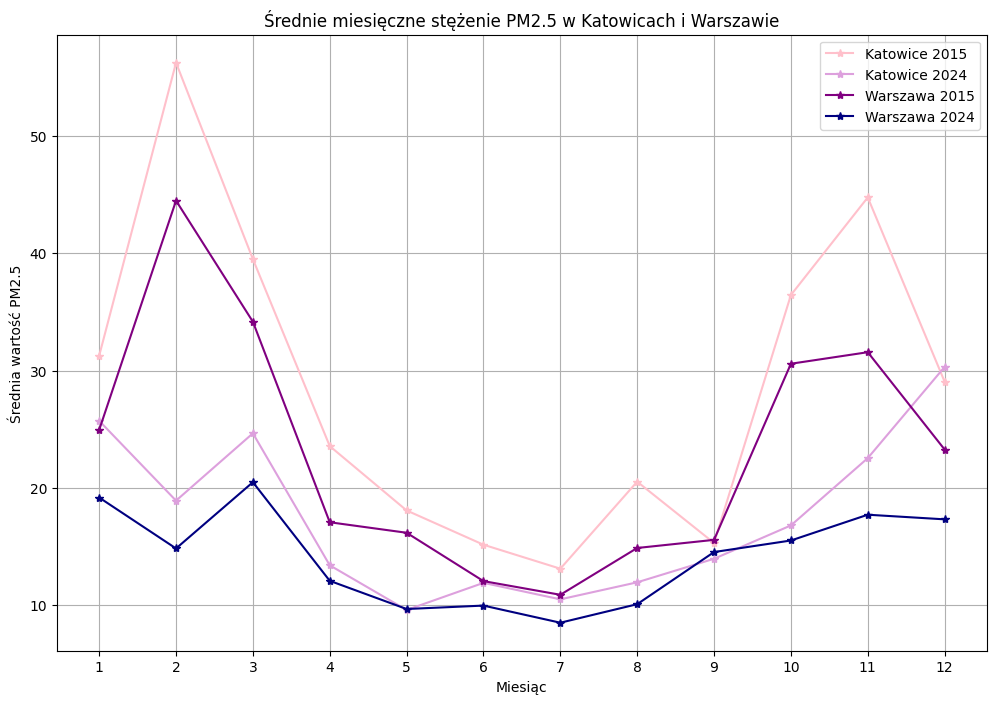

In [10]:
#rysuje wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku.
#po prostu wywołuję funkcję zdefiniowana w wizualizacje.py
wykres_porownanie_miast(srednie_po_stacjach, [2015, 2024])

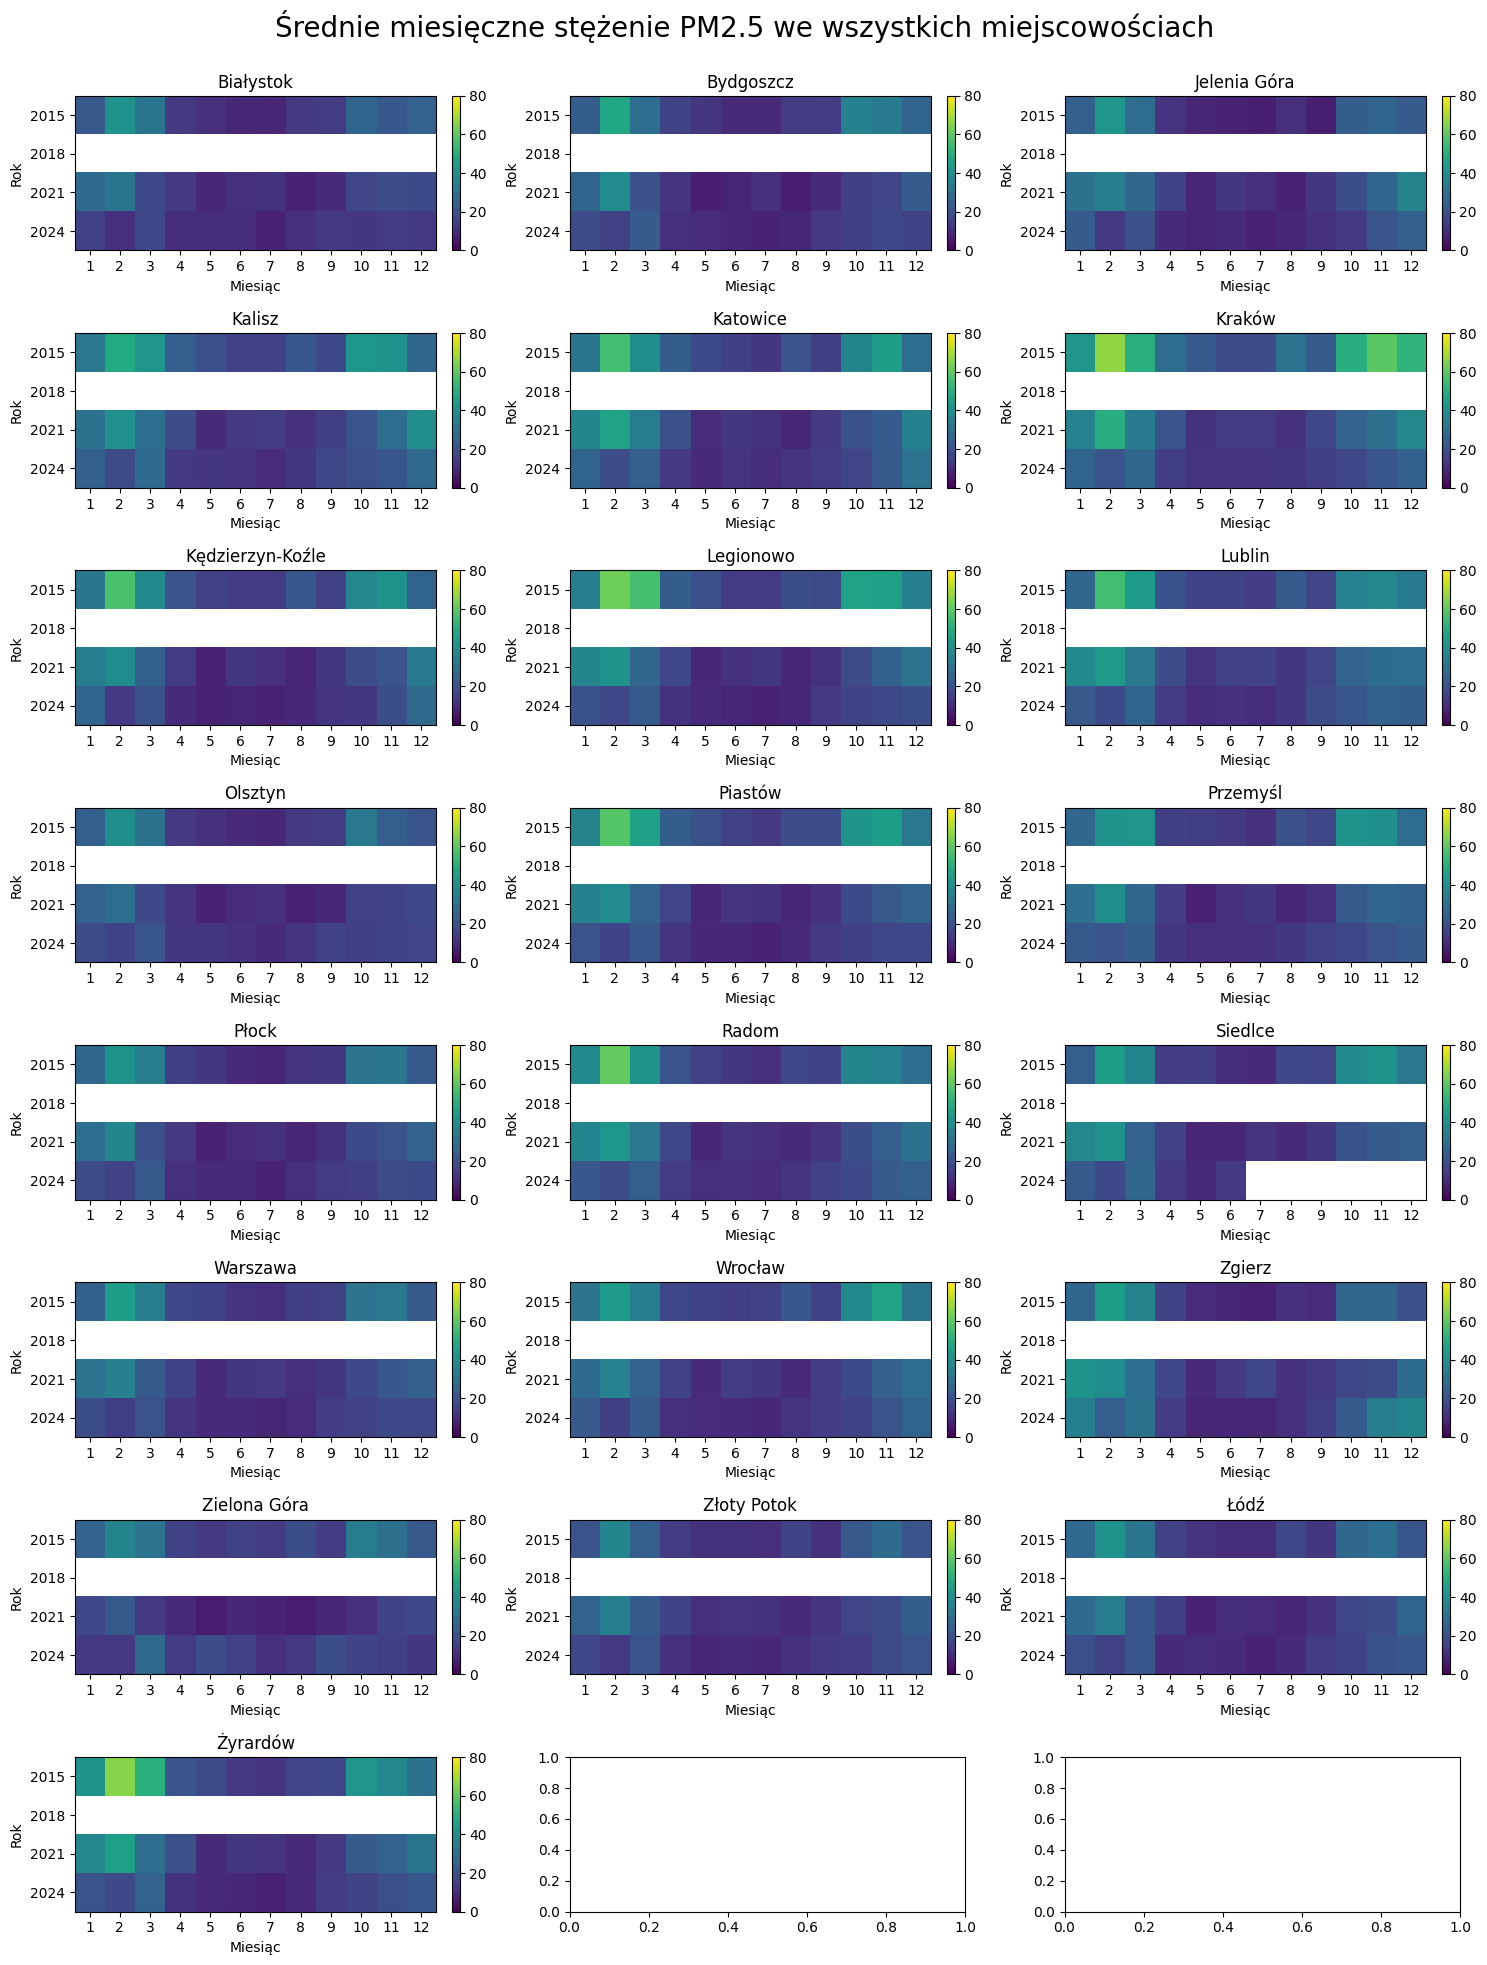

In [11]:
#kolejny wykres- heatmapa średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 
wykres_heatmap_srednie(data, srednie_po_stacjach, lata=[2015,2018,2021,2024])

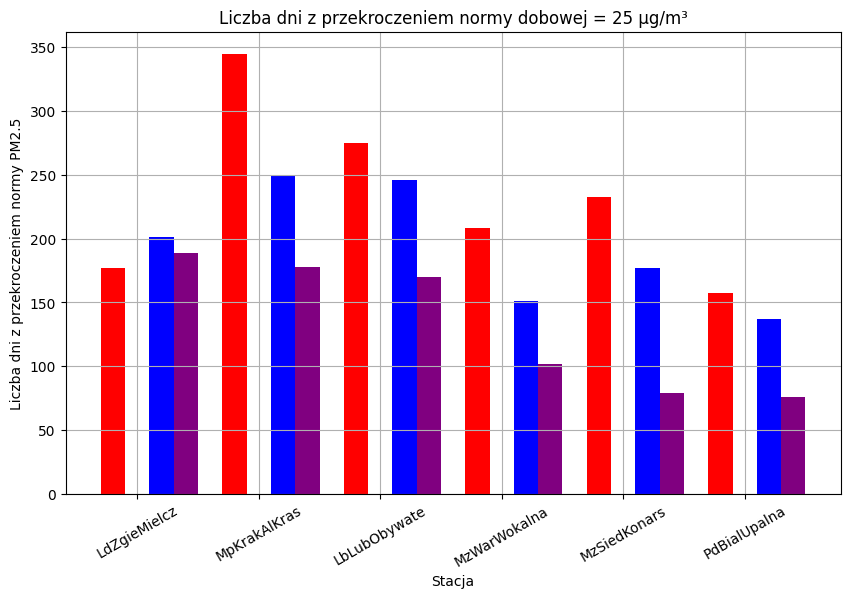

In [12]:
#kolejny wykres- barplot dla 3 min i 3 max stacji:
ile_dni_wybrane_stacje = dni_wiecej_normy[wybrane_stacje]
wykres_przekroczenia(ile_dni_wybrane_stacje, wybrane_stacje, lata=[2015,2018,2021,2024], norma_dobowa=25)